In [62]:
#Diabetes Prediction Using Machine Learning

In [13]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read data in csv format
df = pd.read_csv("health care diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
#Exploratory Data Analysis (EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
##check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
#As per null function result we don't see any null value still we further invisigate on data using visualization

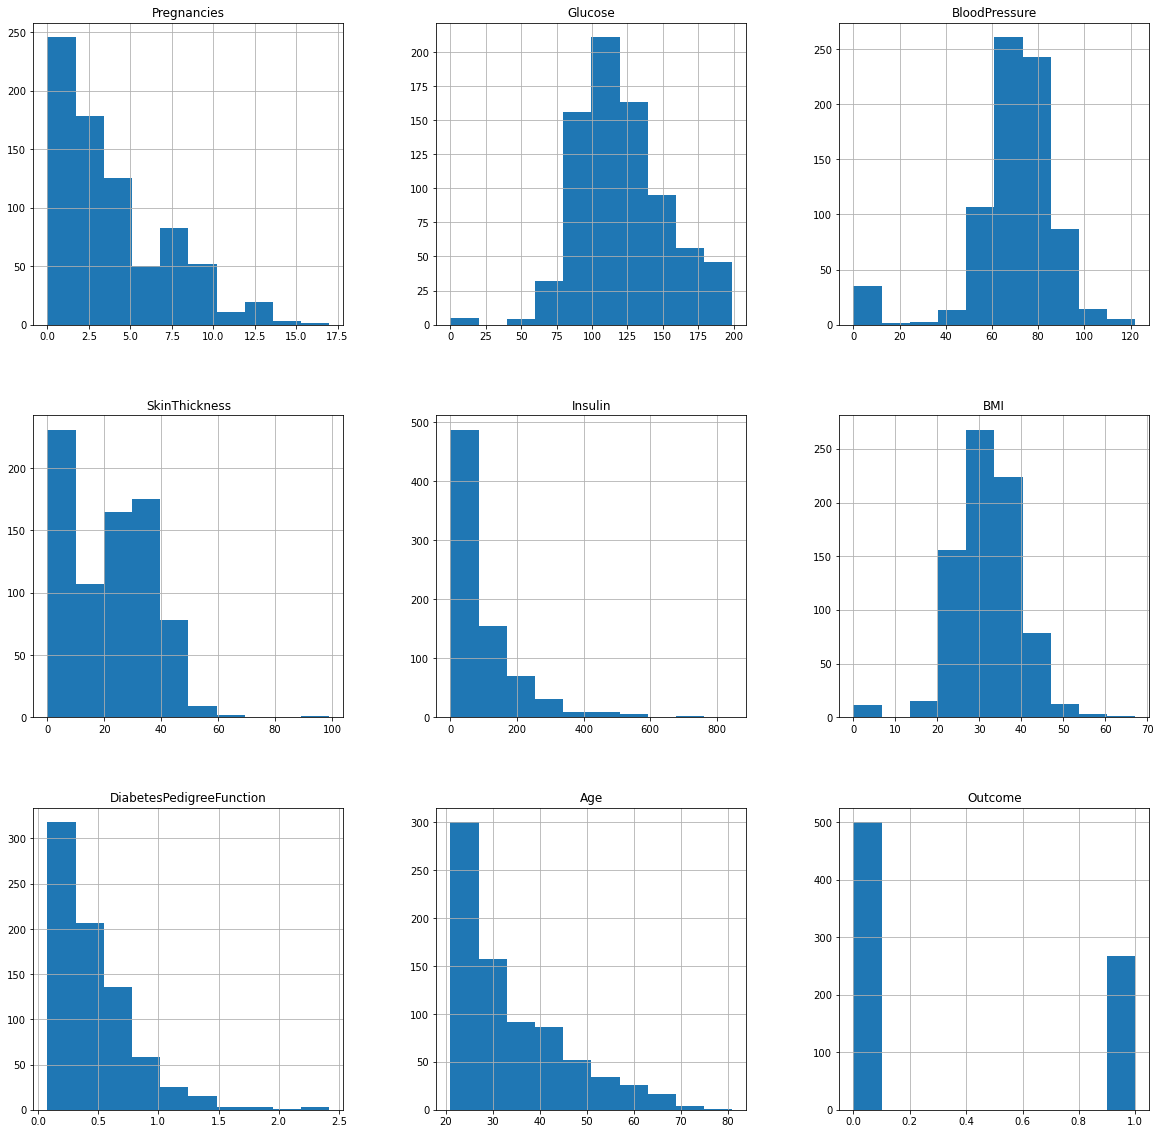

In [9]:
#data visualization
df.hist(figsize=(20,20));

In [10]:
# As per visualization analysis we can see some independent variables have given zero value which is not good for 
# data authencity so here we are going to replace that zero value with NAN first and find out total count of Null values 
# per parameter 

In [11]:
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

In [12]:
# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
# A really fantsatic and intelligent way to deal with blanks, from Thoman Konstantin in: https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data
DT_bmi_pipe = Pipeline( steps = [('scale', StandardScaler()),
                                 ('lr', DecisionTreeRegressor(random_state=42))
                                ])
X = df[['Age','Pregnancies','BMI']].copy()
#X.gender = X.gender.replace({'Male':0, 'Female':1, 'Other':-1}).astype(np.uint8)

Missing = X[X.BMI.isna()]
X = X[~ X.BMI.isna()]
Y = X.pop('BMI')
DT_bmi_pipe.fit(X, Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['Age','Pregnancies']]),index = Missing.index)
df.loc[Missing.index,'BMI'] = predicted_bmi

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

In [76]:
# Now that we have total count of null values in some variables, 
# we will further process our data to replace that null values with respective variable mean or median value

In [77]:
# Imputing the mean/ mode value of the column to each missing value of that particular column
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)


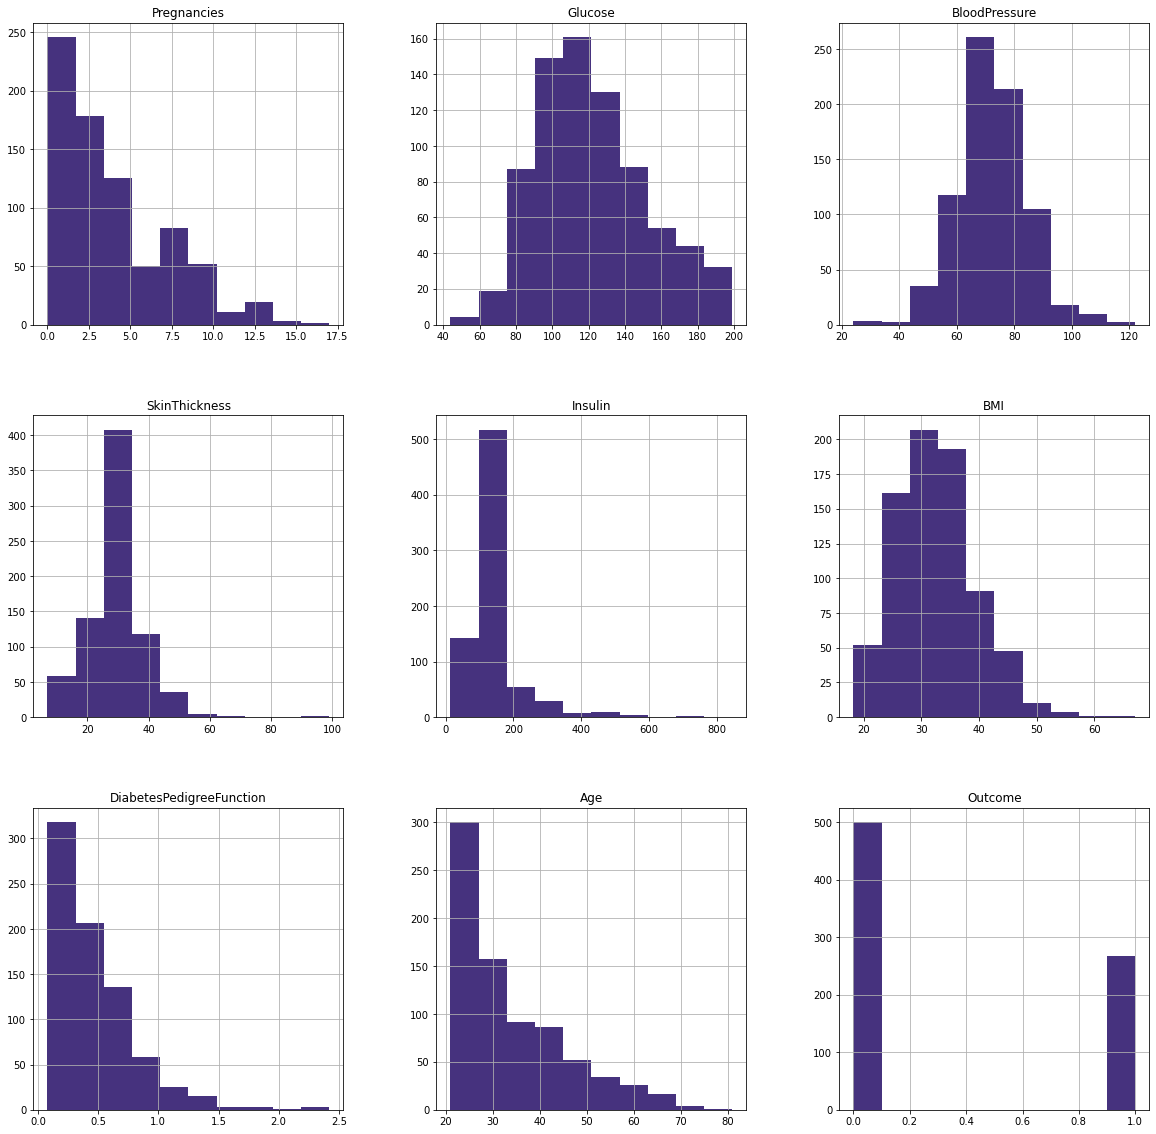

In [78]:
# visualtion of data after removing NaN values
df_copy.hist(figsize=(20,20));

In [79]:
# Now again using data visualization we checked data distribution of our data

In [80]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


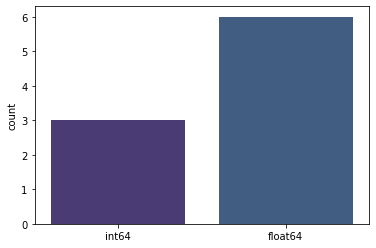

In [81]:
# Count (frequency) plot describing the data types and the count of variables
sns.countplot(df_copy.dtypes.map(str))
plt.show();

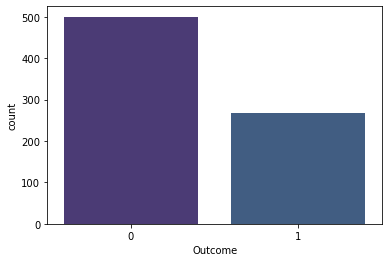

In [82]:
# Plotting the count of outcomes by their value
sns.countplot(x = 'Outcome', data = df_copy)
plt.show();

In [83]:
# From above visualization of Outcome we can clearly see that data is imbalanced in fact 
# the number of patients who are diabetic is half of the patients who are non-diabetic.

<Figure size 720x720 with 0 Axes>

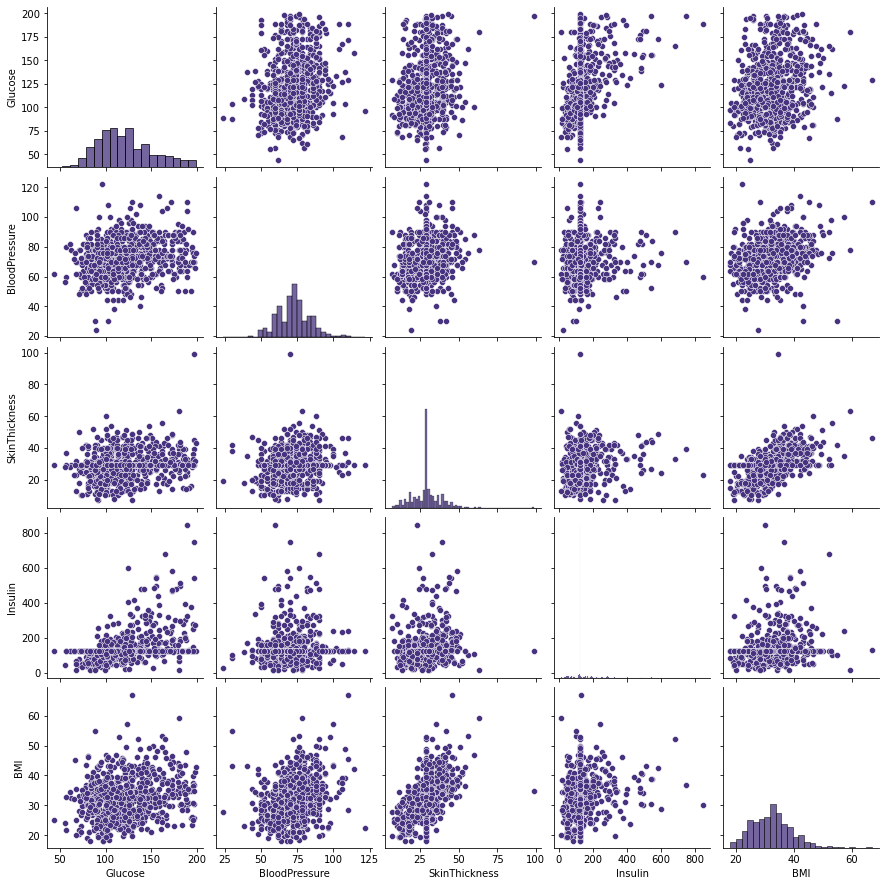

In [84]:
# Correlation analysis

plt.figure(figsize=(10, 10))

#plotting graphs
sns.set_palette("viridis")
sns.pairplot(df_copy[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']])

In [85]:
# from above visualization we can see column Insulin value is shooting from middle,
# so we would further invesitigate it using boxplot on Insulin column.

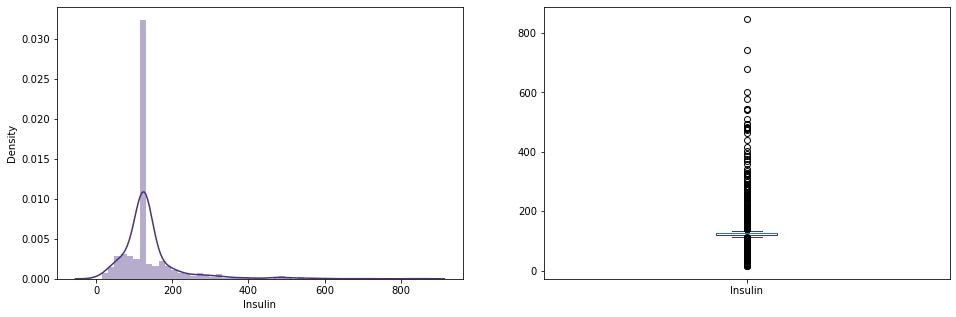

In [86]:
plt.subplot(121), sns.distplot(df_copy['Insulin'])
plt.subplot(122), df_copy['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [87]:
# Here as we can see there are lot many outliers, so in this case removing this big number data will directly affect dataset
# hence it is wise to keep data with outliers, 
# already to lesson the effect we hace imputed median value in Insulin column 
# as well as we have scaled down the value.

<AxesSubplot:>

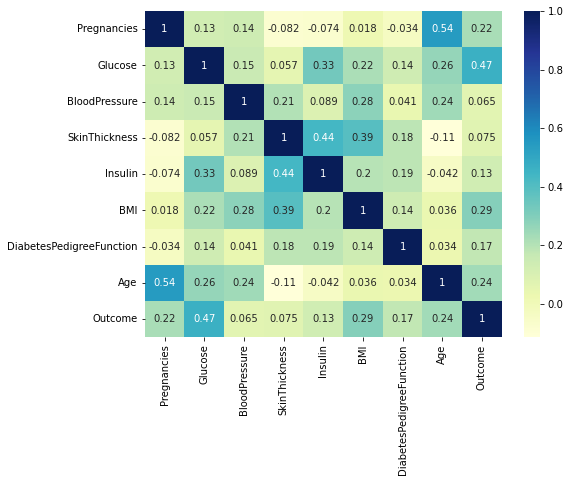

In [88]:
#correlation analysis(Heat map)
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', ax=ax)

In [89]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [90]:
# Normalization on data
stand_X = StandardScaler()
X =  pd.DataFrame(stand_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [91]:
#Now we can see after scalling down every value is on the same scale which will help our ML model to predict better result

In [92]:
#Explore target model
y = df_copy.Outcome

In [93]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [94]:
#Model Building
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=10)

In [95]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier =  LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [96]:
y_predict_LR = classifier.predict(X_test)

In [97]:
#Confusion Matrix
cm_LR = confusion_matrix(y_test, y_predict_LR)

print("Confusion Matrix for Logistic Regression model: \n", cm_LR)

Confusion Matrix for Logistic Regression model: 
 [[127  17]
 [ 44  43]]


In [98]:
#Decission Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [99]:
y_predict_DT = regressor.predict(X_test)

In [100]:
#Confusion Matrix
cm_DT = confusion_matrix(y_test, y_predict_DT)

print("Confusion Matrix for Decission Tree model: \n", cm_DT)

Confusion Matrix for Decission Tree model: 
 [[115  29]
 [ 43  44]]


In [101]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [102]:
y_predict_RF = rfc.predict(X_test)

In [103]:
#Confusion Matrix
cm_RF = confusion_matrix(y_test, y_predict_RF)

print("Confusion Matrix for Random Forest model: \n", cm_RF)

Confusion Matrix for Random Forest model: 
 [[130  14]
 [ 44  43]]


In [104]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [105]:
y_predict_svc = svc_model.predict(X_test)

In [106]:
#Confusion Matrix
cm_svc = confusion_matrix(y_test, y_predict_svc)

print("Confusion Matrix for Support Vector Machine model: \n", cm_svc)

Confusion Matrix for Support Vector Machine model: 
 [[130  14]
 [ 46  41]]


In [107]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [108]:
y_predict_nb = nb_classifier.predict(X_test)

In [109]:
#Confusion Matrix
cm_nb = confusion_matrix(y_test, y_predict_nb)

print("Confusion Matrix for Naive Bayes model: \n", cm_nb)

Confusion Matrix for Naive Bayes model: 
 [[124  20]
 [ 41  46]]


In [110]:
# k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
 
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [111]:
y_predict_knn = knn_classifier.predict(X_test)

In [112]:
#Confusion Matrix
cm_knn = confusion_matrix(y_test, y_predict_knn)

print("Confusion Matrix for k-nearest neighbor model: \n", cm_knn)

Confusion Matrix for k-nearest neighbor model: 
 [[116  28]
 [ 32  55]]


In [113]:
#Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
GBC_classifier = GradientBoostingClassifier()

GBC_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [114]:
y_predict_GBC = GBC_classifier.predict(X_test)

In [115]:
#Confusion Matrix
cm_GBC = confusion_matrix(y_test, y_predict_GBC)

print("Confusion Matrix for k-nearest neighbor model: \n", cm_GBC)

Confusion Matrix for k-nearest neighbor model: 
 [[126  18]
 [ 34  53]]


In [116]:
from sklearn.metrics import accuracy_score
print ("Accuracy for Logistic Regression model :    ", accuracy_score(y_test, y_predict_LR))
print ("Accuracy for Decission Tree model :         ", accuracy_score(y_test, y_predict_DT))
print ("Accuracy for Random Forest model :          ", accuracy_score(y_test, y_predict_RF))
print ("Accuracy for Support Vector Machine model : ", accuracy_score(y_test, y_predict_svc))
print ("Accuracy for Naive Bayes model :            ", accuracy_score(y_test, y_predict_nb))
print ("Accuracy for k-nearest neighbor model :     ", accuracy_score(y_test, y_predict_knn))
print ("Accuracy for Gradient Boosting model :      ", accuracy_score(y_test, y_predict_GBC))

Accuracy for Logistic Regression model :     0.7359307359307359
Accuracy for Decission Tree model :          0.6883116883116883
Accuracy for Random Forest model :           0.7489177489177489
Accuracy for Support Vector Machine model :  0.7402597402597403
Accuracy for Naive Bayes model :             0.7359307359307359
Accuracy for k-nearest neighbor model :      0.7402597402597403
Accuracy for Gradient Boosting model :       0.7748917748917749


In [117]:
# let's compare sensetivity and specificity on KNN and Gradient Boosting model and Random Forest model
# Sensitivity
total_knn = sum(sum(cm_knn))

sensitivity_knn = cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1])
print("sensitivity knn: ",sensitivity_knn)

specificity_knn = cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1])
print("specificity knn: ",specificity_knn)


sensitivity knn:  0.8055555555555556
specificity knn:  0.632183908045977


In [118]:
total_GBC = sum(sum(cm_GBC))

sensitivity_GBC = cm_GBC[0,0]/(cm_GBC[0,0]+cm_GBC[0,1])
print("sensitivity GBC: ",sensitivity_GBC)

specificity_GBC = cm_GBC[1,1]/(cm_GBC[1,0]+cm_GBC[1,1])
print("specificity GBC: ",specificity_GBC)

sensitivity GBC:  0.875
specificity GBC:  0.6091954022988506


In [119]:
total_RF = sum(sum(cm_RF))

sensitivity_RF = cm_RF[0,0]/(cm_RF[0,0]+cm_RF[0,1])
print("sensitivity RF: ",sensitivity_RF)

specificity_RF = cm_RF[1,1]/(cm_RF[1,0]+cm_RF[1,1])
print("specificity RF: ",specificity_RF)

sensitivity RF:  0.9027777777777778
specificity RF:  0.4942528735632184


In [ ]:
# As we can see compared to knn model, Gradient Boosting model is giving heigh accuracy and
# second heighest accuracy by Random Forest model
# As we know "For the healthcare and financial domain, models with high sensitivity will be desired."
# here after comparing with above said three models sensitivity of Random Forest model is high 

In [125]:
from sklearn import metrics
fpr, tpr,_ = metrics.roc_curve(y_test,  y_predict_RF)
#define metrics
auc = metrics.roc_auc_score(y_test, y_predict_RF)

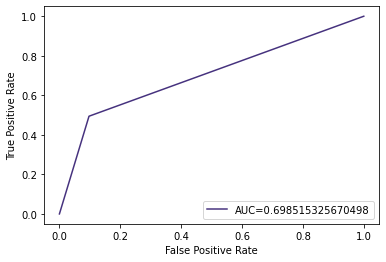

In [126]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [122]:
#Conclusion : Therefore Random Forest model is the best model for this prediction
# since it has accuracy_score of 0.7489 with heigh sensitivity 0.90 with low specificity 0.49